# BigMart-Data-Analysis-and-Prediction-Using-Sales-Data

## Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## Hypothesis Generation

Certainly! Here's a restructured version of the store and product level hypotheses for better clarity:

**Store Level Hypotheses:**

1. **City Type:** Sales are expected to be higher in stores located in urban or Tier 1 cities due to the higher income levels of residents in these areas.
   
2. **Population Density:** Stores situated in densely populated areas are anticipated to achieve higher sales due to increased demand.

3. **Store Capacity:** Larger-sized stores are likely to experience higher sales as they serve as convenient one-stop-shops, catering to customers' varied needs.

4. **Competitors:** Stores in proximity to similar establishments may experience lower sales due to heightened competition in the area.

5. **Marketing:** Stores with effective marketing divisions are expected to generate higher sales by attracting customers through targeted offers and advertising.

6. **Location:** Stores located within popular marketplaces are predicted to have higher sales owing to better accessibility and visibility to potential customers.

7. **Customer Behavior:** Stores offering a tailored selection of products that align with local preferences are likely to achieve higher sales.

8. **Ambiance:** Well-maintained stores managed by polite and humble staff members are expected to attract more foot traffic, resulting in higher sales.

**Product Level Hypotheses:**

1. **Brand:** Products from established brands are anticipated to achieve higher sales due to the increased trust placed by customers in recognized brands.

2. **Packaging:** Products with appealing packaging are expected to attract more customers, leading to increased sales.

3. **Utility:** Daily use products are likely to have a higher sales tendency compared to products with specific use cases.

4. **Display Area:** Products placed on larger shelves within the store are expected to capture more attention, translating into higher sales.

5. **Visibility in Store:** Products positioned at the entrance of the store are likely to attract more customer attention and result in higher sales compared to those placed further inside.

6. **Advertising:** Products with effective in-store advertising are expected to achieve higher sales.

7. **Promotional Offers:** Products accompanied by attractive offers and discounts are likely to experience increased sales.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df_train=pd.read_csv("Train.csv")
df_test=pd.read_csv("Test.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df_train.shape,df_test.shape

((8523, 12), (5681, 11))

In [6]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [12]:
df_train["Type"]="Train"
df_test["Type"]="Test"

In [13]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train


In [14]:
df_test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Test
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,Test


In [15]:
df=pd.concat([df_train,df_test],sort=False)

In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [17]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Type                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [20]:
cat_vars=df.select_dtypes(include="object").columns.tolist()
cat_vars

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Type']

In [21]:
df["Item_Identifier"].nunique()

1559

In [22]:
df["Outlet_Identifier"].nunique()

10

In [23]:
cat_vars.remove("Item_Identifier")
cat_vars.remove("Outlet_Identifier")

In [24]:
cat_vars

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Type']

In [25]:
for i in cat_vars:
    print(i)
    print(df[i].nunique())
    print(df[i].unique())
    print("---------")

Item_Fat_Content
5
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
---------
Item_Type
16
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
---------
Outlet_Size
3
['Medium' nan 'High' 'Small']
---------
Outlet_Location_Type
3
['Tier 1' 'Tier 3' 'Tier 2']
---------
Outlet_Type
4
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
---------
Type
2
['Train' 'Test']
---------


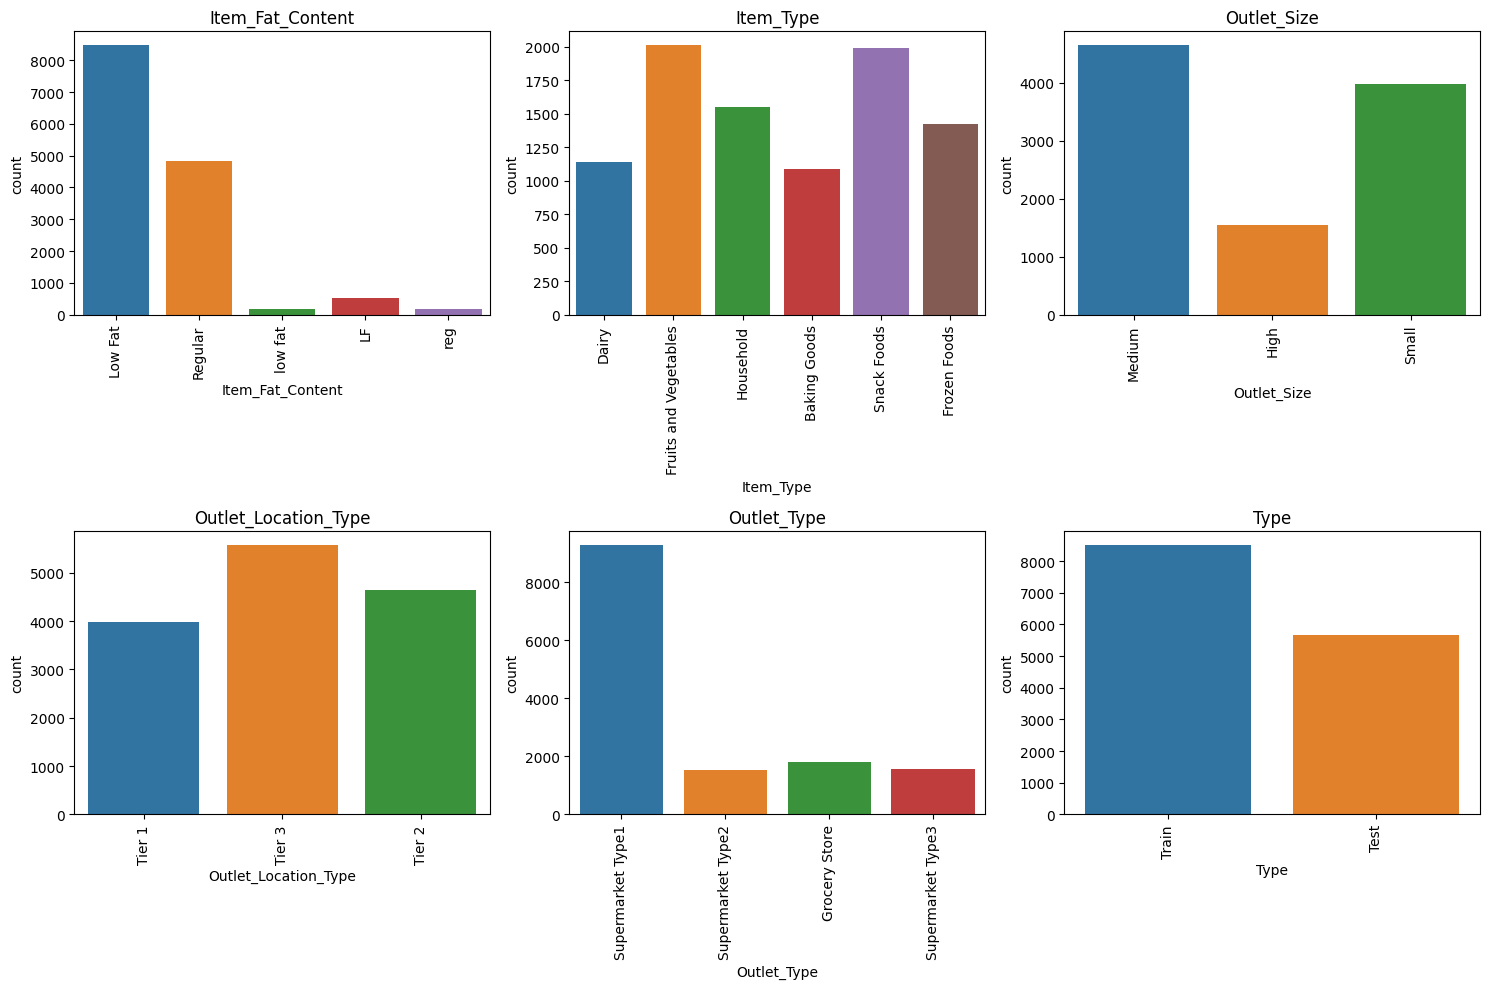

In [26]:
nc=len(cat_vars)
nr=(nc+2)//3
fig, axs=plt.subplots(nrows=nr,ncols=3, figsize=(15,5*nr))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
    top_values=df[var].value_counts().nlargest(6).index
    fdf=df[df[var].isin(top_values)]
    sns.countplot(x=var,data=fdf,ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis="x",rotation=90)
if nc<len(axs):
        for i in range(nc,len(axs)):
             fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

In [27]:
mc=5
cat_cols=[col for col in df.columns if  df[col].dtype=="object"]
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Type']

In [28]:
cat_cols.remove("Item_Identifier")
cat_cols.remove("Outlet_Identifier")

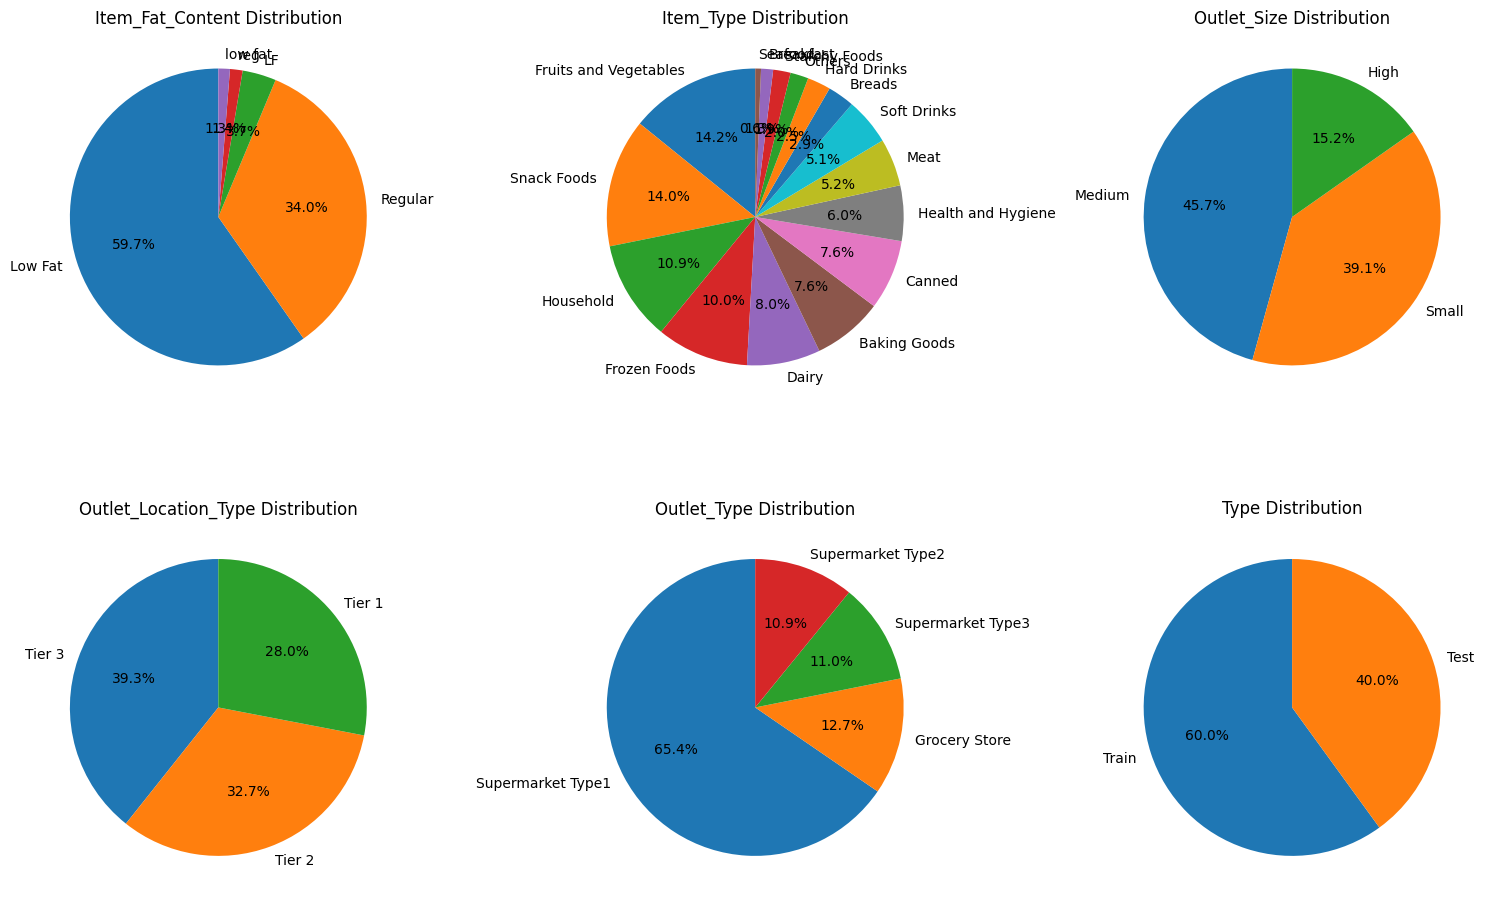

In [29]:
nc=len(cat_cols)
nr=(nc+2)//3
fig, axs=plt.subplots(nrows=nr,ncols=3, figsize=(15,5*nr))
axs=axs.flatten()

for i,col in enumerate(cat_cols):
    cat_counts=df[col].value_counts()
    
    axs[i].pie(cat_counts,labels=cat_counts.index,autopct="%1.1f%%",startangle=90)
    axs[i].set_title(f"{col} Distribution")
if nc<len(axs):
        for i in range(nc,len(axs)):
             fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

In [30]:
num_vars=df.select_dtypes("float").columns.tolist()
num_vars

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

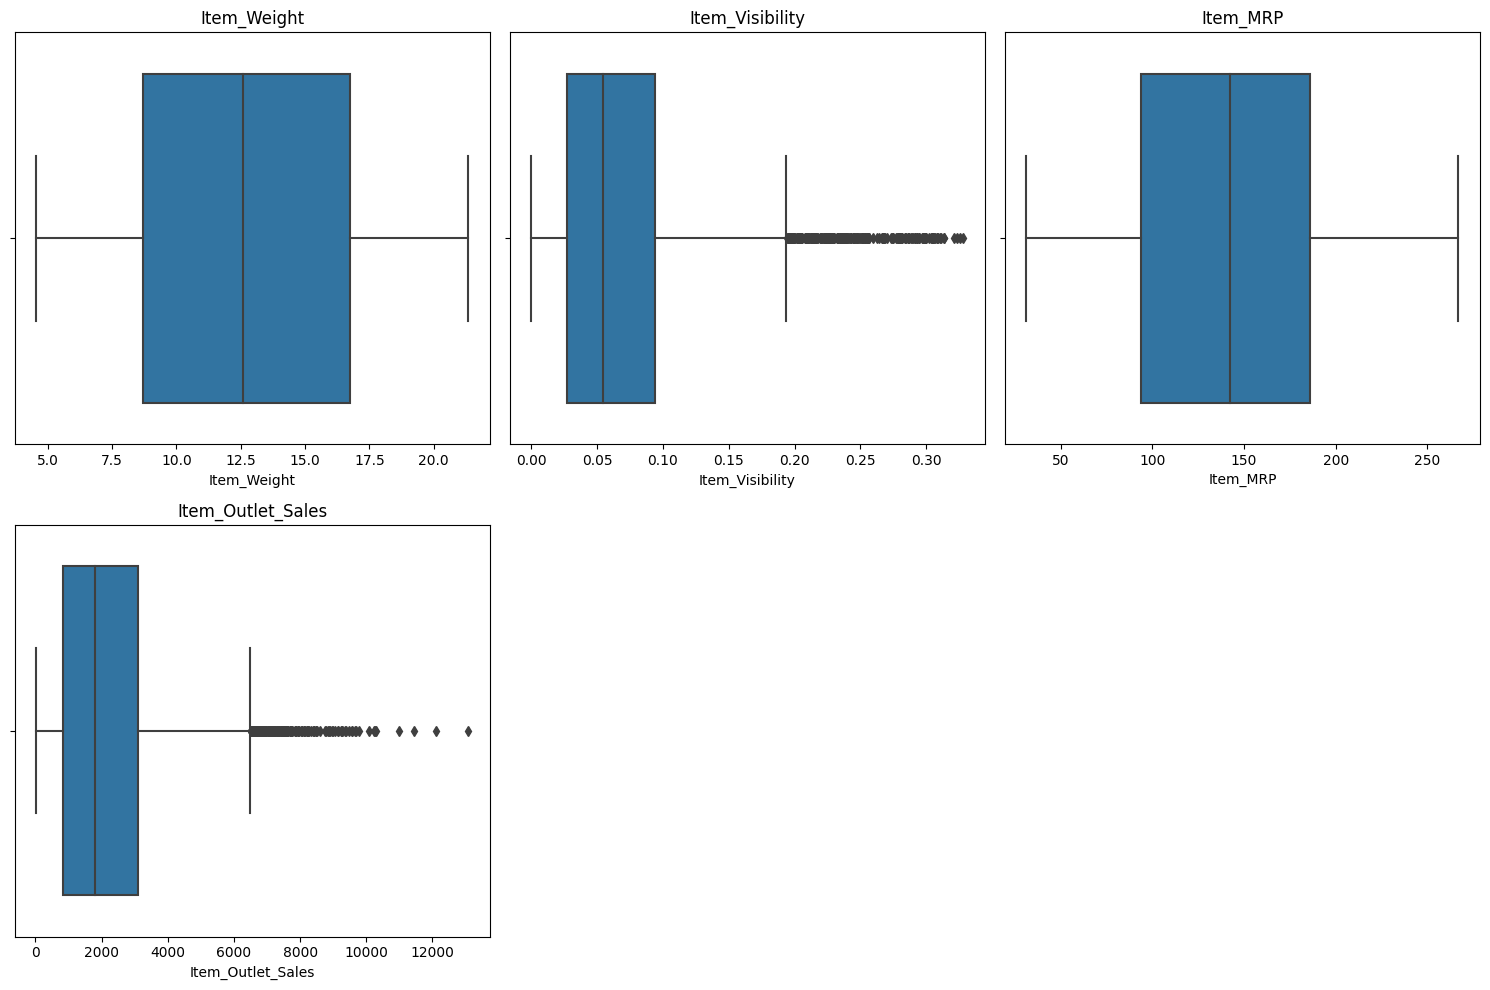

In [31]:
nc=len(num_vars)
nr=(nc+2)//3
fig, axs=plt.subplots(nrows=nr,ncols=3, figsize=(15,5*nr))
axs=axs.flatten()

for i,var in enumerate(num_vars):
    sns.boxplot(x=df[var],ax=axs[i])
    axs[i].set_title(var)
if nc<len(axs):
        for i in range(nc,len(axs)):
             fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

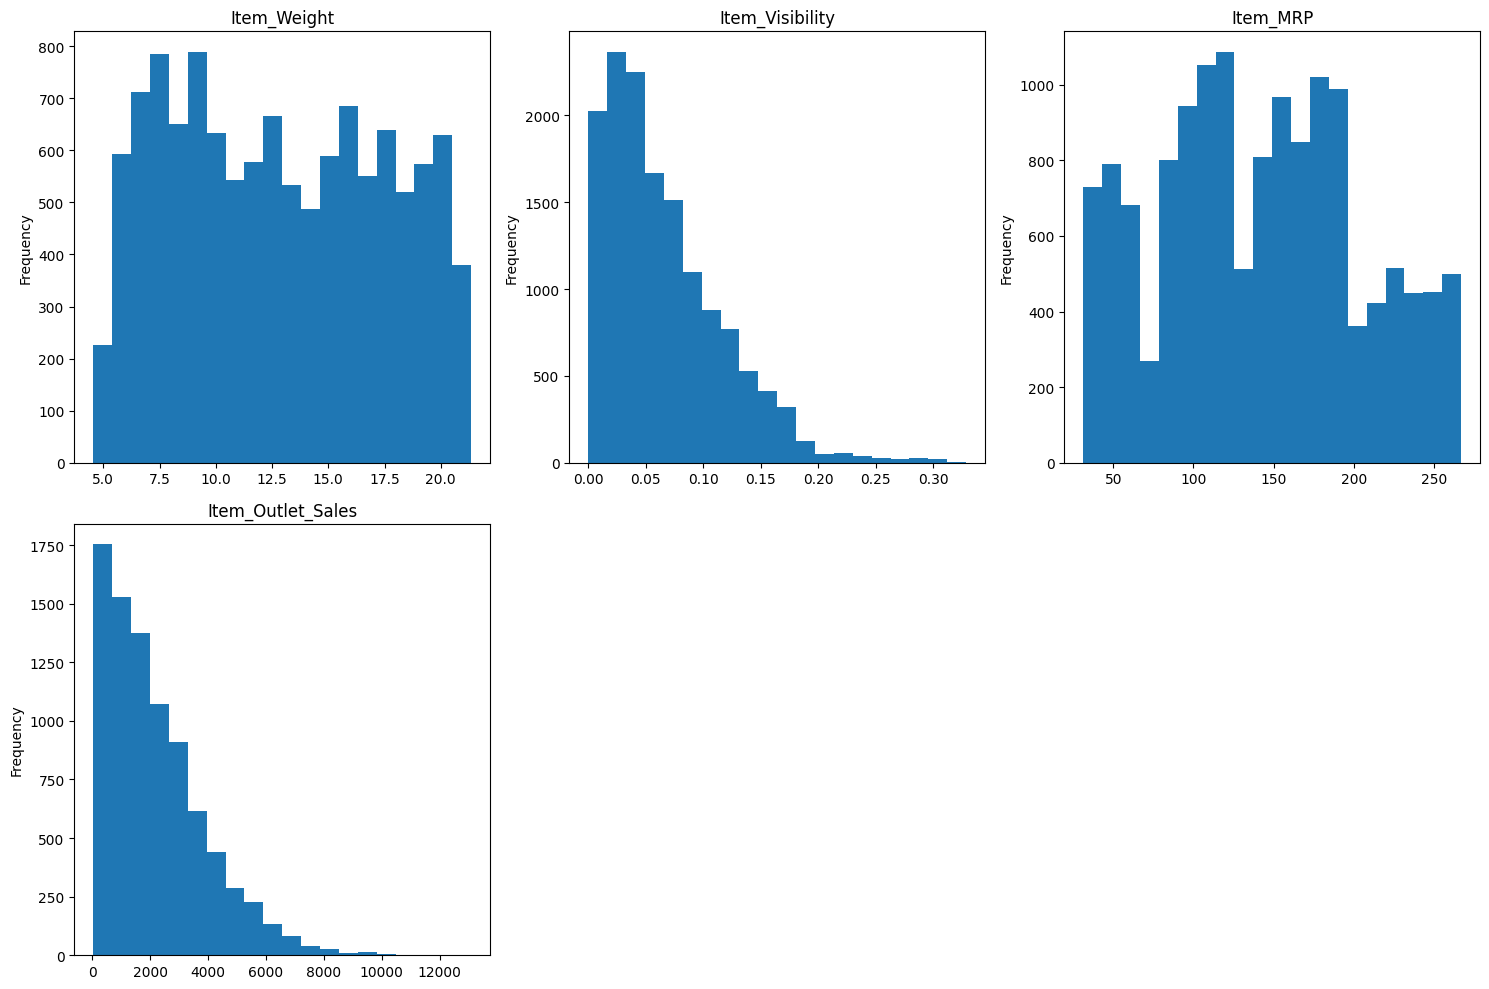

In [32]:
num_vars=df.select_dtypes("float").columns.tolist()
nc=len(num_vars)
nr=(nc+2)//3
fig, axs=plt.subplots(nrows=nr,ncols=3, figsize=(15,5*nr))
axs=axs.flatten()

for i,var in enumerate(num_vars):
    df[var].plot.hist(ax=axs[i],bins=20)
    axs[i].set_title(var)
if nc<len(axs):
        for i in range(nc,len(axs)):
             fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

In [33]:
df["Outlet_Establishment_Year"].nunique()

9

In [34]:
df["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

## Missing Values

In [35]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False,True,False
5677,False,False,False,False,False,False,False,False,False,False,False,True,False
5678,False,False,False,False,False,False,False,False,True,False,False,True,False
5679,False,False,False,False,False,False,False,False,True,False,False,True,False


In [36]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Type                            0
dtype: int64

In [37]:
df.isnull().sum()/df.shape[0]

Item_Identifier              0.000000
Item_Weight                  0.171712
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282737
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.399958
Type                         0.000000
dtype: float64

The Missing Value percentage for Item_Weight and Outlet_Size is less than 30% , so we will impute the missing values.

In [38]:
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [39]:
df["Outlet_Size"]=df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [40]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Type                            0
dtype: int64

## Feature Engineering

In [41]:
df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [42]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

In [43]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [44]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

In [45]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

# Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [49]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [50]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Type                          object
Outlet_Years                   int64
Item_Fat_Content_0              bool
Item_Fat_Content_1              bool
Outlet_Location_Type_0          bool
Outlet_Location_Type_1          bool
Outlet_Location_Type_2          bool
Outlet_Size_0                   bool
Outlet_Size_1                   bool
Outlet_Size_2                   bool
Outlet_Type_0                   bool
Outlet_Type_1                   bool
Outlet_Type_2                   bool
Outlet_Type_3                   bool
Item_Type_Combined_0            bool
Item_Type_Combined_1            bool
Item_Type_Combined_2            bool
Outlet_0                        bool
Outlet_1                        bool
O

In [51]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [52]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Type,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,Train,14,True,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,Train,4,False,True,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,Train,14,True,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,Train,15,False,True,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,Train,26,True,False,...,False,True,False,False,False,False,False,False,False,False


In [53]:
[df['Type']=="Train"]

[0        True
 1        True
 2        True
 3        True
 4        True
         ...  
 5676    False
 5677    False
 5678    False
 5679    False
 5680    False
 Name: Type, Length: 14204, dtype: bool]

In [54]:
train = df[df['Type']=="Train"]
test = df[df['Type']=="Test"]



In [55]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Type,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,0.016047,249.8092,OUT049,3735.1380,Train,14,True,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.920,0.019278,48.2692,OUT018,443.4228,Train,4,False,True,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.500,0.016760,141.6180,OUT049,2097.2700,Train,14,True,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.200,0.000000,182.0950,OUT010,732.3800,Train,15,False,True,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.930,0.000000,53.8614,OUT013,994.7052,Train,26,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,2778.3834,Train,26,True,False,...,False,True,False,False,False,False,False,False,False,False
8519,FDS36,8.380,0.046982,108.1570,OUT045,549.2850,Train,11,False,True,...,False,False,False,False,False,False,False,True,False,False
8520,NCJ29,10.600,0.035186,85.1224,OUT035,1193.1136,Train,9,True,False,...,False,False,False,False,False,False,True,False,False,False
8521,FDN46,7.210,0.145221,103.1332,OUT018,1845.5976,Train,4,False,True,...,False,False,False,True,False,False,False,False,False,False


In [56]:
test

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Type,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750000,0.007565,107.8622,OUT049,NaN,Test,14,True,False,...,False,False,False,False,False,False,False,False,False,True
1,FDW14,8.300000,0.038428,87.3198,OUT017,NaN,Test,6,False,True,...,False,False,True,False,False,False,False,False,False,False
2,NCN55,14.600000,0.099575,241.7538,OUT010,NaN,Test,15,True,False,...,True,False,False,False,False,False,False,False,False,False
3,FDQ58,7.315000,0.015388,155.0340,OUT017,NaN,Test,6,True,False,...,False,False,True,False,False,False,False,False,False,False
4,FDY38,12.792854,0.118599,234.2300,OUT027,NaN,Test,28,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,0.013496,141.3154,OUT046,NaN,Test,16,False,True,...,False,False,False,False,False,False,False,False,True,False
5677,FDD47,7.600000,0.142991,169.1448,OUT018,NaN,Test,4,False,True,...,False,False,False,True,False,False,False,False,False,False
5678,NCO17,10.000000,0.073529,118.7440,OUT045,NaN,Test,11,True,False,...,False,False,False,False,False,False,False,True,False,False
5679,FDJ26,15.300000,0.000000,214.6218,OUT017,NaN,Test,6,False,True,...,False,False,True,False,False,False,False,False,False,False


In [57]:
test.drop(['Item_Outlet_Sales','Type',"Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)
train.drop(['Type',"Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [58]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,3735.1380,14,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,0.019278,48.2692,443.4228,4,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0.016760,141.6180,2097.2700,14,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,19.20,0.000000,182.0950,732.3800,15,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,53.8614,994.7052,26,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [59]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750000,0.007565,107.8622,14,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,8.300000,0.038428,87.3198,6,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,14.600000,0.099575,241.7538,15,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,7.315000,0.015388,155.0340,6,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,12.792854,0.118599,234.2300,28,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [60]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [61]:
tf=pd.read_csv("train_modified.csv")

In [62]:
tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,3735.1380,14,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,0.019278,48.2692,443.4228,4,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0.016760,141.6180,2097.2700,14,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,19.20,0.000000,182.0950,732.3800,15,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,53.8614,994.7052,26,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [63]:
tf.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [64]:
X=tf.drop(columns=["Item_Outlet_Sales"])
y=tf["Item_Outlet_Sales"]

In [65]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,14,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,0.019278,48.2692,4,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0.016760,141.6180,14,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,19.20,0.000000,182.0950,15,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,53.8614,26,True,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False


## Model Building

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [67]:
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)   

Model Report
MSE: 1270947.9464339546
CV Score: 1276687.5244574964


<Axes: title={'center': 'Model Coefficients'}>

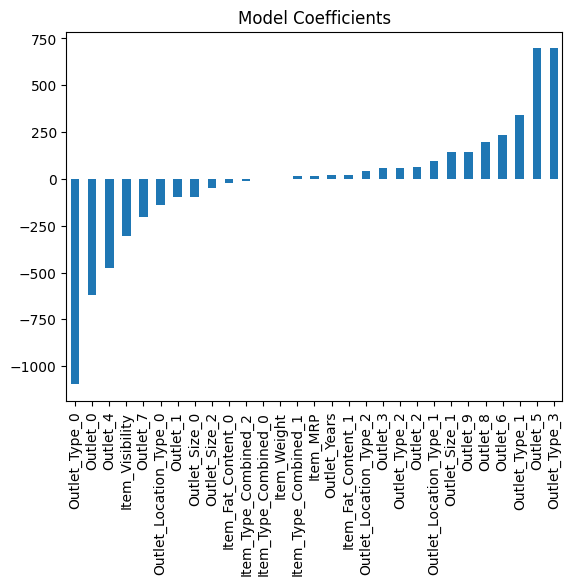

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1270948.498525825
CV Score: 1276649.8485518578


<Axes: title={'center': 'Model Coefficients'}>

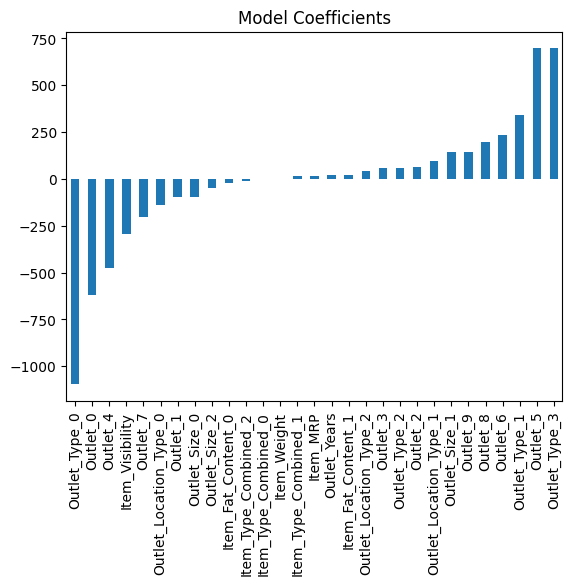

In [69]:
model = Ridge()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1271257.3993692093
CV Score: 1276342.3072078289


<Axes: title={'center': 'Model Coefficients'}>

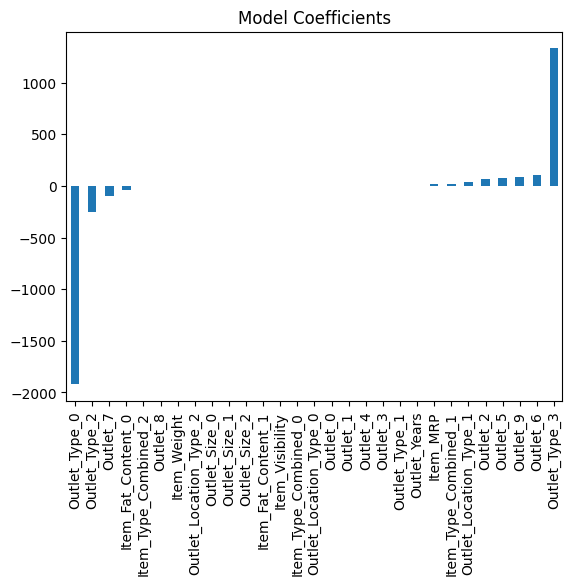

In [70]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.0
CV Score: 2348381.1171514164


<Axes: title={'center': 'Feature Importance'}>

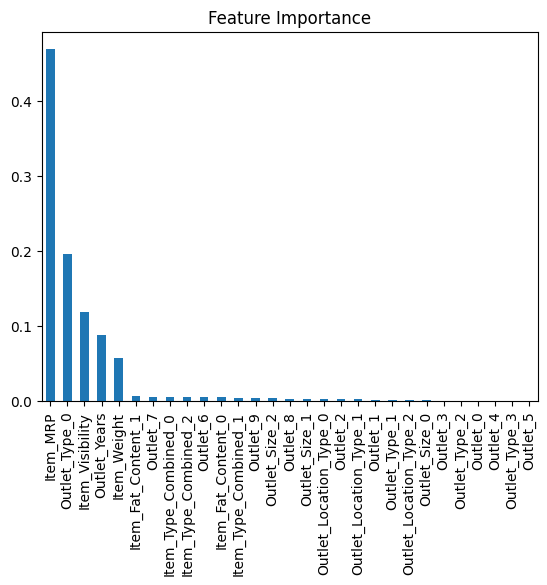

In [71]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 177988.41368866936
CV Score: 1308465.5065753446


<Axes: title={'center': 'Feature Importance'}>

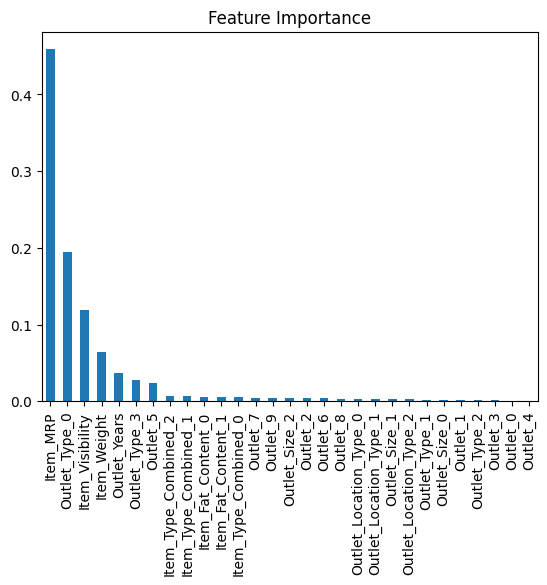

In [72]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 474539.40994523116
CV Score: 1427342.100546049


<Axes: title={'center': 'Feature Importance'}>

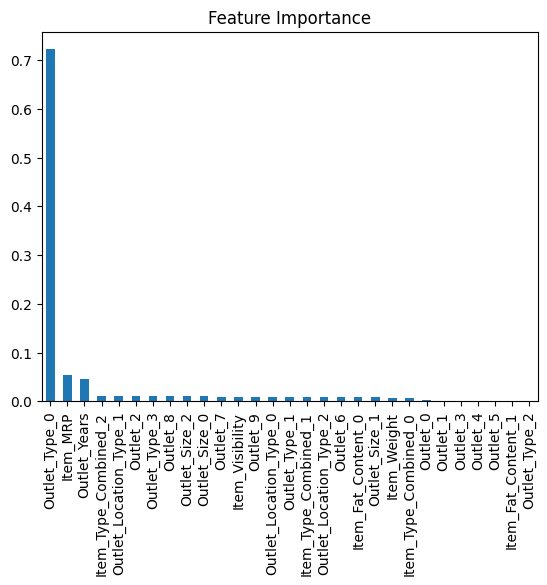

In [73]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [74]:
ttf=pd.read_csv("test_modified.csv")

In [75]:
ttf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750000,0.007565,107.8622,14,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,8.300000,0.038428,87.3198,6,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,14.600000,0.099575,241.7538,15,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,7.315000,0.015388,155.0340,6,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,12.792854,0.118599,234.2300,28,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [76]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,14,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,0.019278,48.2692,4,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0.016760,141.6180,14,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,19.20,0.000000,182.0950,15,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,53.8614,26,True,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False


In [77]:
tval=ttf.iloc[0,:].to_numpy()
tval2=tf.iloc[0,:].to_numpy()

In [78]:
tval

array([20.75, 0.007564836, 107.8622, 14, True, False, True, False, False,
       False, True, False, False, True, False, False, False, True, False,
       False, False, False, False, False, False, False, False, False,
       True], dtype=object)

In [79]:
tval2

array([9.3, 0.016047301, 249.8092, 3735.138, 14, True, False, True, False,
       False, False, True, False, False, True, False, False, False, True,
       False, False, False, False, False, False, False, False, False,
       False, True], dtype=object)

In [80]:
model.predict([tval])

array([1588.6559], dtype=float32)